<a href="https://colab.research.google.com/github/NikkoLindstomKarpinnen/demucs/blob/master/002_Nicolas_Reyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

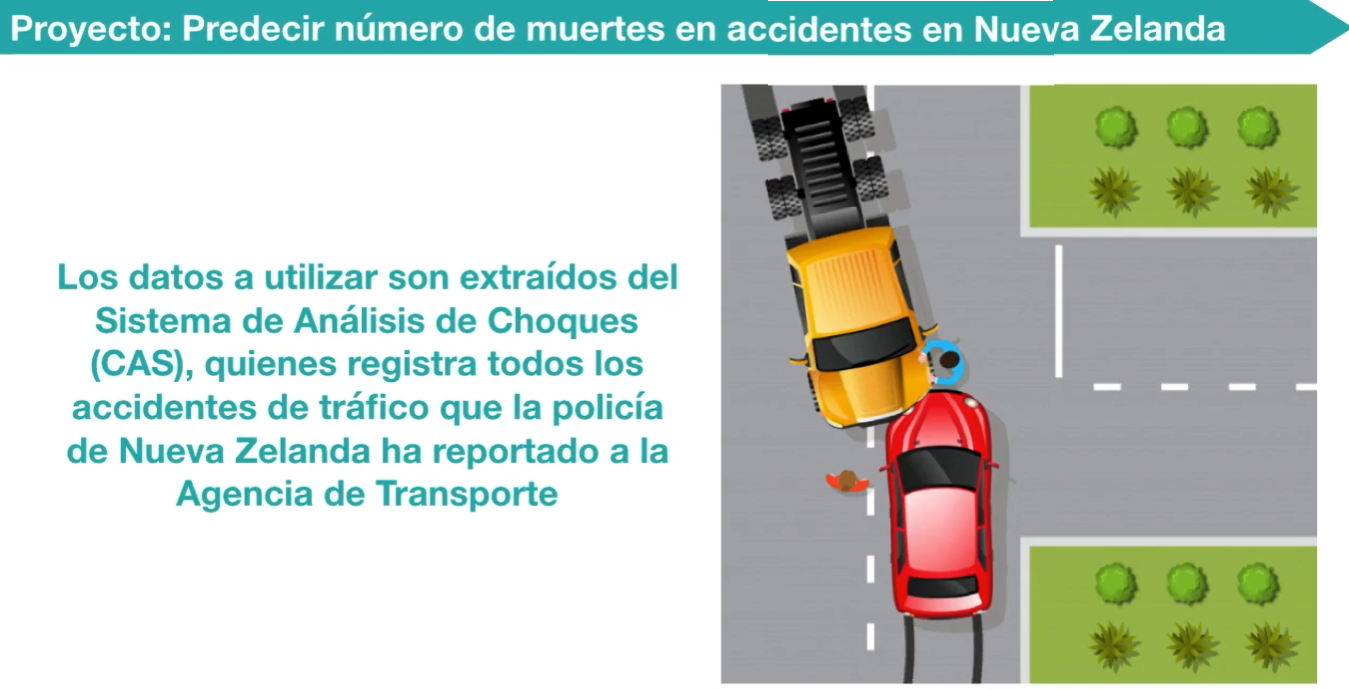

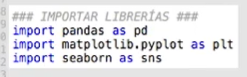

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

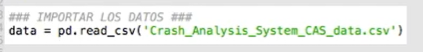

In [33]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crash_Analysis_System_CAS_data.csv')

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


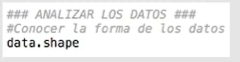

In [35]:
data.head()

,X,Y,OBJECTID_1,OBJECTID,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,multiVehic,holiday,regionDesc,tlaID,tlaName,areaUnitID,meshblockI,easting,northing,crashLocat,crashLoc_1,outdatedLo,crashRPRS,intersecti,junctionTy,cornerRoad,crashDirec,crashDista,crashRPDir,directionR,crashRPDis,crashSHDes,crashRPSH,crashRPNew,intersec_1,flatHill,roadCharac,roadCurvat,roadLane,roadMarkin,...,streetLigh,weatherA,weatherB,animals,bridge,cliffBank,debris,ditch,fence,guardRail,houseBuild,kerb,objectThro,other,overBank,parkedVehi,phoneBoxEt,postOrPole,roadworks,slipFlood,strayAnima,trafficIsl,trafficSig,train,tree,vehicle,waterRiver,bicycle,bus,carStation,moped,motorcycle,otherVehic,schoolBus,suv,taxi,truck,unknownVeh,vanOrUtili,Pedestrian
0,175.226860,-37.820620,667848,2001,2000,1999/2000,S,0,2,0,Single vehicle,None,Waikato,16,Hamilton City,527820,979000,1796000,5811751,TUHIKARAMEA ROAD,COWLEY DRIVE,Current location,0,Unknown,Unknown,1.0,South,170,0.0,North,0,No,0.0,0.0,Mid Block,Hill,Unknown,Easy Curve,2.0,Painted Island,...,Off,Fine,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,175.289010,-37.998924,667849,2002,2000,1999/2000,M,0,0,1,Single vehicle,None,Waikato,17,Waipa District,527924,981600,1800985,5791832,PIRONGIA ROAD,ALEXANDRA ST,Current location,0,Unknown,Unknown,1.0,West,1300,0.0,West,0,No,0.0,0.0,Mid Block,Flat,Unknown,Moderate Curve,2.0,Centre Line,...,None,Fine,Unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,176.193733,-37.665581,667850,2003,2000,1999/2000,M,0,0,1,Multi vehicle,None,Bay of Plenty,23,Tauranga City,536821,1203900,1881707,5826488,SH 2,HOCKING ST,Current location,157,Unknown,Unknown,1.0,West,50,NaN,East,823,Yes,2.0,0.0,Mid Block,Flat,Unknown,Straight Road,2.0,Centre Line,...,On,Light Rain,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
3,176.160955,-37.695747,667851,2004,2000,1999/2000,M,0,0,1,Multi vehicle,None,Bay of Plenty,23,Tauranga City,538201,1166500,1878702,5823238,CAMERON ROAD,NINTH AVENUE,Current location,0,Unknown,Unknown,1.0,South,50,0.0,North,0,No,0.0,0.0,Mid Block,Flat,Unknown,Straight Road,2.0,Raised Island,...,Off,Fine,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
4,176.981378,-37.957300,667852,2005,2000,1999/2000,M,0,0,1,Multi vehicle,None,Bay of Plenty,25,Whakatane District,542410,1309701,1949826,5791440,EIVERS ROAD,HIKURANGI ST,Current location,0,Intersection,T Type Junction,1.0,NaN,0,0.0,North,0,No,0.0,0.0,Intersection,Flat,Unknown,Straight Road,2.0,Centre Line,...,Off,Fine,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [36]:
data.shape

(674321, 90)

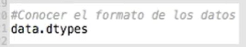

In [37]:
data.dtypes

X             float64
Y             float64
OBJECTID_1      int64
OBJECTID        int64
crashYear       int64
               ...   
taxi            int64
truck           int64
unknownVeh      int64
vanOrUtili      int64
Pedestrian      int64
Length: 90, dtype: object

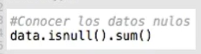

In [38]:
data.isnull().sum()

X             0
Y             0
OBJECTID_1    0
OBJECTID      0
crashYear     0
             ..
taxi          0
truck         0
unknownVeh    0
vanOrUtili    0
Pedestrian    0
Length: 90, dtype: int64

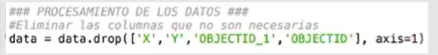

In [39]:
data = data.drop(['X','Y','OBJECTID_1','OBJECTID'], axis=1)

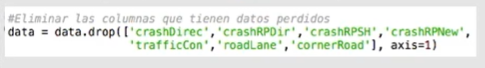

In [40]:
data = data.drop(['crashDirec','crashRPDir','crashRPSH','crashRPNew',
                  'trafficCon','roadLane','cornerRoad'], axis=1)

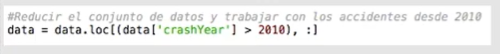

In [41]:
data = data.loc[(data['crashYear'] > 2010), :]

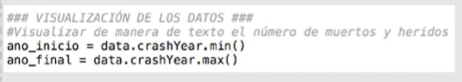

In [42]:
ano_inicio = data.crashYear.min()
ano_final = data.crashYear.max()

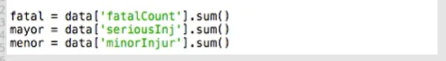

In [43]:
fatal = data ['fatalCount'].sum()
mayor = data['seriousInj'].sum()
menor = data['minorInjur'].sum()

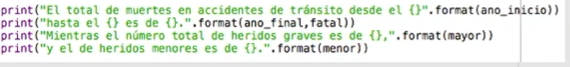

In [44]:
print("El total de muertes en accidentes de transito desde el {}".format(ano_inicio))
print("Hasta el {} es de {}".format(ano_final,fatal))
print("Mientras el numero total de heridos graves es de {}".format(mayor))
print("Y el de heridos menores es de {}".format(menor))

El total de muertes en accidentes de transito desde el 2011
Hasta el 2018 es de 2430
Mientras el numero total de heridos graves es de 17693
Y el de heridos menores es de 79943


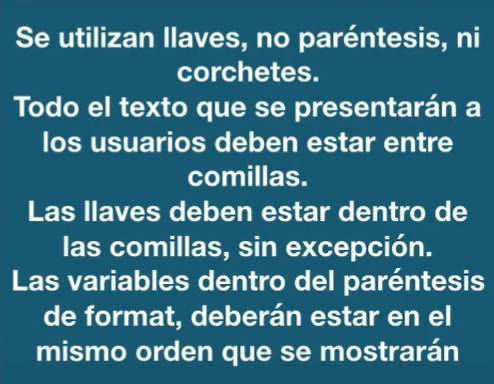

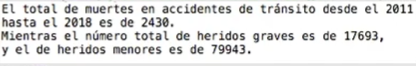

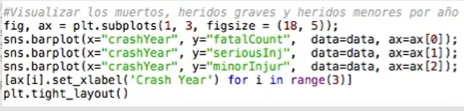

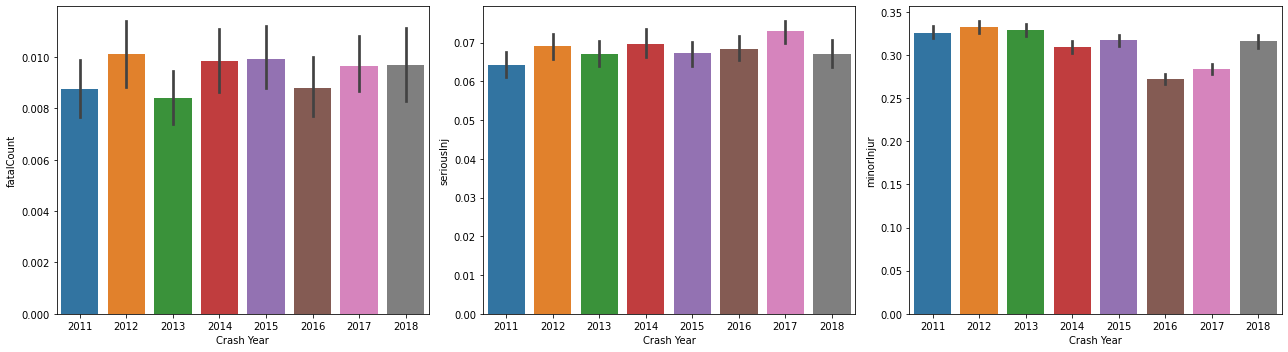

In [45]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5));
sns.barplot(x="crashYear", y="fatalCount", data=data, ax=ax[0]);
sns.barplot(x="crashYear", y="seriousInj", data=data, ax=ax[1]);
sns.barplot(x="crashYear", y="minorInjur", data=data, ax=ax[2]);
[ax[i].set_xlabel("Crash Year") for i in range(3)]
plt.tight_layout()

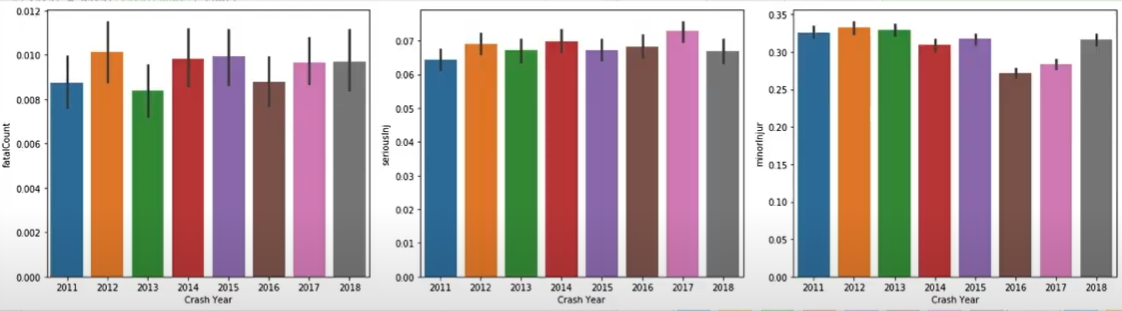

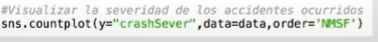

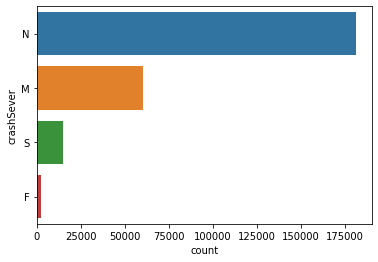

In [46]:
sns.countplot(y="crashSever",data=data,order='NMSF')

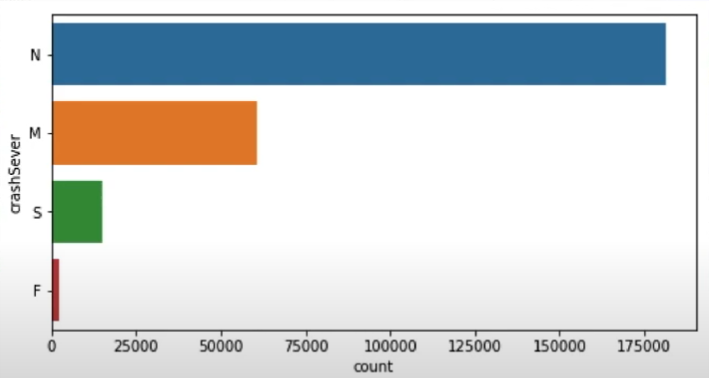

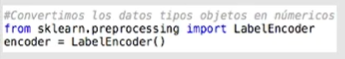

In [47]:
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()

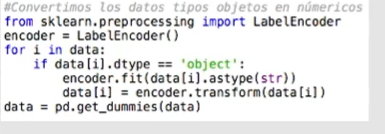

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in data:
  if data[i].dtype == 'object':
    encoder.fit(data[i].astype(str))
    data[i] = encoder.transform(data[i])
data = pd.get_dummies(data)

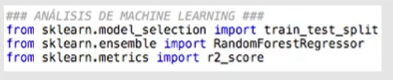

In [49]:
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import  r2_score

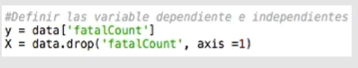

In [51]:
y = data['fatalCount']
x = data.drop('fatalCount', axis =1)

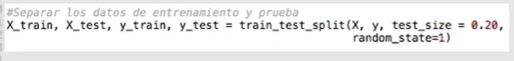

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state=1)

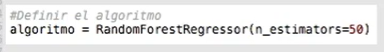

In [54]:
algoritmo = RandomForestRegressor(n_estimators=50)

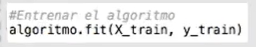

In [56]:
algoritmo.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

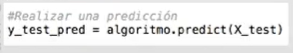

In [57]:
y_test_pred = algoritmo.predict(x_test)

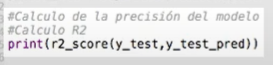

In [58]:
print(r2_score(y_test,y_test_pred))

0.8911600174226559


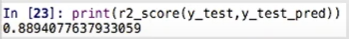

In [62]:
In [23]: print(r2_score(y_test,y_test_pred))

0.8911600174226559
